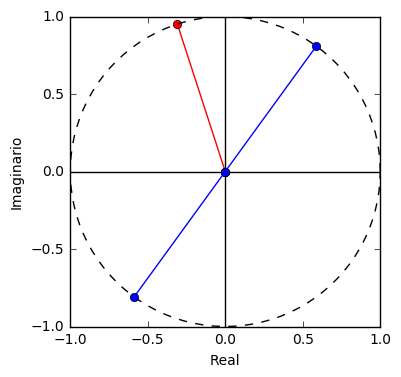

In [1]:
from IPython.html.widgets import *
from ipywidgets import widgets
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt


n = 2
a = 1

def complex_roots(a,n):
    arg = np.angle(a)
    r = np.sqrt(a*np.conj(a))
    k = np.arange(0,n,1)
    roots = np.power(r,1/n)*(np.cos(arg/n+2*k*np.pi/n)+1j*np.sin(arg/n+2*k*np.pi/n))
    return roots

def roots(a , n):
    plt.plot([0,a.real],[0,a.imag],'ro-',label='python')
    t = np.linspace(0,np.pi*2,100)
    z = np.sqrt(a*np.conj(a))
    w = np.angle(a)
    plt.figure(1)
    plt.plot(z*np.cos(t), z*np.sin(t),'k--')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    y = np.linspace(-limit,limit)
    plt.plot(0*y,y,'k-')
    plt.plot(y,0*y,'k-')
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginario')
    plt.xlabel('Real')
    plt.gca().set_aspect('equal', adjustable='box')
    roots = complex_roots(a,n)
    for x in range(len(roots)):
        plt.plot([0,roots[x].real],[0,roots[x].imag],'bo-',label='python')
    plt.savefig('complex_roots.png', bbox_inches='tight')
    plt.show()

text = widgets.Text()

def handle_submit(sender):
    global n
    n = int(text.value)
    
text.on_submit(handle_submit)

def roots_aux(f):
    c = np.cos(f*np.pi)+1j*np.sin(f*np.pi)
    global a
    a = c
    roots(a,n)

roots(a,n)

slider = interact(roots_aux, f = (0,2,0.04))
display(text)